## The Fashion-MNIST Dataset

The Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot


### **Read in the data and create X matrix and y vector**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [23]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [24]:
X_train.shape

(60000, 28, 28)

In [25]:
X_test.shape

(10000, 28, 28)

## **Visualize the 1st sample in the training set reshaped to a 28x28 image**

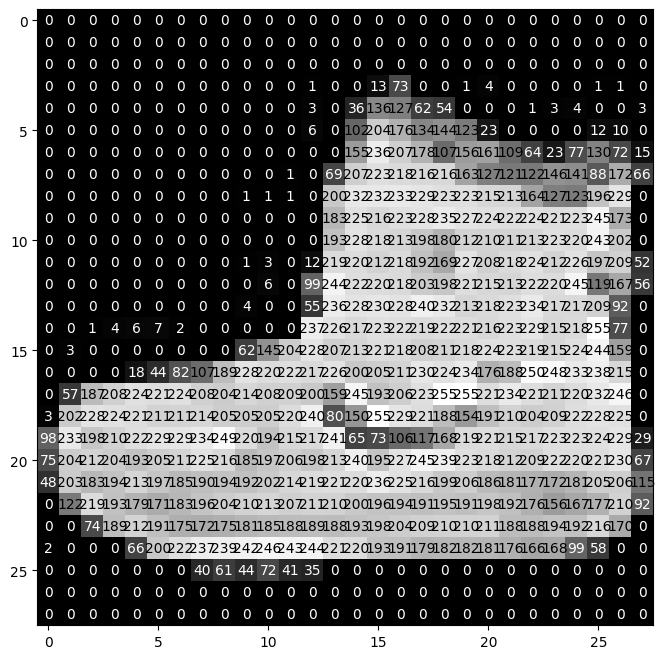

In [26]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
visualize_input(X_train[0].reshape(28,28), ax)

### **Pixel intensities go from 0 to 255, so it is generally accepted to scale images by dividing by 255. This would scale the raw pixel intensities to the range [0, 1]**

##### **Double check to ensure matrices were scales**

In [27]:
X_train = X_train/255
X_test = X_test/255

In [28]:
np.min(X_train)

0.0

In [29]:
np.max(X_train)

1.0

### **Flatten the Image. This helps get an input column with just a single column or variables. Made it a vector**

In [30]:
## Flatten the Image. This helps get an input column with just a single column or variables. Made it a vector
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

### **Feed Forward Neural Network**

* 1st takes 784 input variables, representing a flattened 28x28 pixel image
* Relu activation is used for the following hidden layers
* A 10% dropout is used after each hidden layer to avoid potential overfitting

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

nn = Sequential()
nn.add(Input(shape= 784)) ## input variables
nn.add(Dense(units = 250, activation = "relu")) ## hidden layer 1
nn.add(Dropout(.1))
nn.add(Dense(units = 100, activation = "relu")) ## hidden layer 2
nn.add(Dropout(.1))
nn.add(Dense(units = 10, activation = "softmax")) ## output layer

In [32]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               196250    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               25100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 222360 (868.59 KB)
Trainable params: 222360 (868.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [34]:
nn.fit(X_train, y_train, batch_size = 32, validation_data = (X_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 12s 4ms/step - loss: 0.5263 - accuracy: 0.8131 - val_loss: 0.4048 - val_accuracy: 0.8563
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3812 - accuracy: 0.8609 - val_loss: 0.3868 - val_accuracy: 0.8584
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3431 - accuracy: 0.8748 - val_loss: 0.3653 - val_accuracy: 0.8694
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3221 - accuracy: 0.8819 - val_loss: 0.3414 - val_accuracy: 0.8804
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3058 - accuracy: 0.8871 - val_loss: 0.3321 - val_accuracy: 0.8802
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2923 - accuracy: 0.8904 - val_loss: 0.3318 - val_accuracy: 0.8787
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2781 - accuracy: 0.8958 - val_loss: 0.3319 - val_accuracy

### **Model Performance**

313/313 [==============================] - 1s 2ms/step


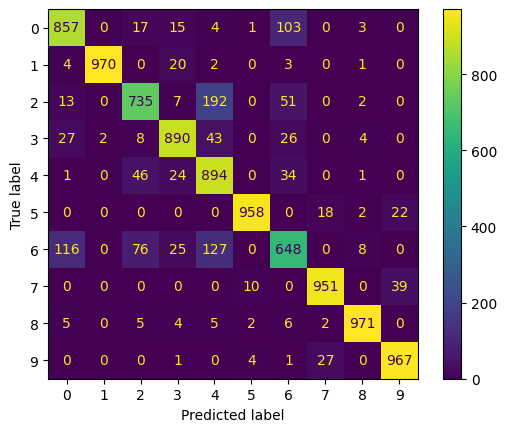

In [35]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
ConfusionMatrixDisplay(confusion_matrix(y_test, np.argmax(nn.predict(X_test), axis=1))).plot()

In [36]:
predictions = np.argmax(nn.predict(X_test), axis=1)

print(classification_report(y_test, predictions))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.83      0.73      0.78      1000
           3       0.90      0.89      0.90      1000
           4       0.71      0.89      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.74      0.65      0.69      1000
           7       0.95      0.95      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.94      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



## **Visualize the 1st sample in the testing set reshaped to a 28x28 image**

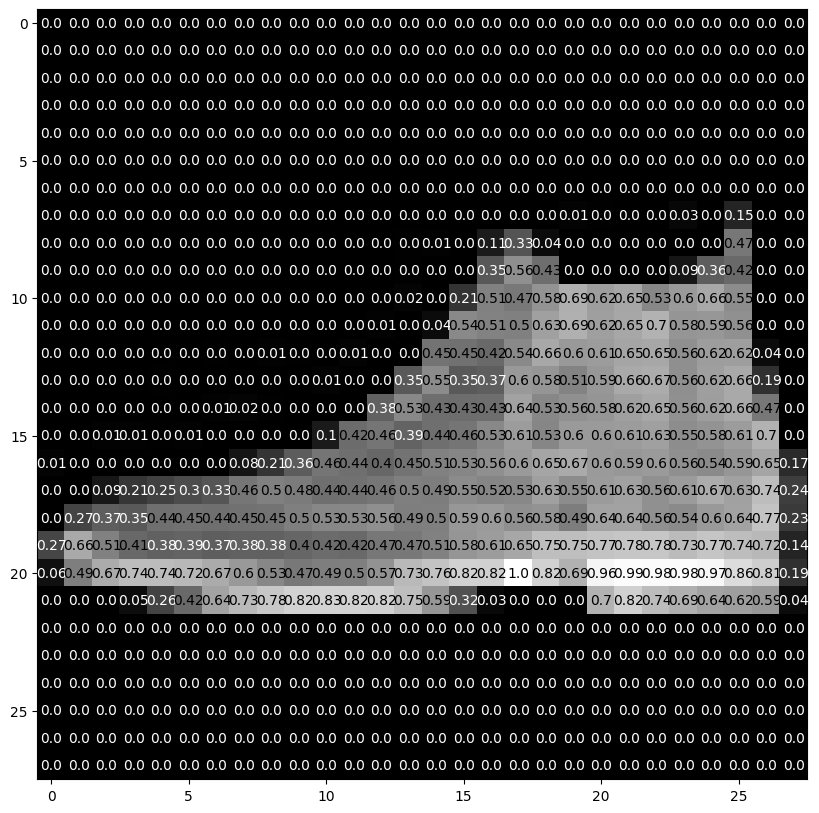

In [37]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
visualize_input(X_test[0].reshape(28,28), ax)